<a href="https://colab.research.google.com/github/elisangelawut/DS-ProjetoFinal/blob/main/ProjetoFinalDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
#importando a biblioteca do pandas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

#localizando os dados que será trabalhado e tratado
dataset = r'/content/sample_data/Online-eCommerce.csv'

produtos = pd.read_csv(dataset)

#identificando as colunas que contem no arquivo e trazendo os 5 primeiros dados
produtos.head()

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan


In [226]:
#Saber a categoria das colunas e a quantidade de colunas
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Number         5095 non-null   float64
 1   State_Code           5095 non-null   object 
 2   Customer_Name        5095 non-null   object 
 3   Order_Date           5095 non-null   object 
 4   Status               5095 non-null   object 
 5   Product              5095 non-null   object 
 6   Category             5095 non-null   object 
 7   Brand                5095 non-null   object 
 8   Cost                 5095 non-null   float64
 9   Sales                5095 non-null   float64
 10  Quantity             5095 non-null   float64
 11  Total_Cost           5095 non-null   float64
 12  Total_Sales          5095 non-null   float64
 13  Assigned Supervisor  5095 non-null   object 
dtypes: float64(6), object(8)
memory usage: 559.0+ KB


In [227]:
#Quantidade de registros e variáveis que temos
produtos.shape

(5110, 14)

In [228]:
#verificar se há registros em branco
print(produtos.isna().sum())

Order_Number           15
State_Code             15
Customer_Name          15
Order_Date             15
Status                 15
Product                15
Category               15
Brand                  15
Cost                   15
Sales                  15
Quantity               15
Total_Cost             15
Total_Sales            15
Assigned Supervisor    15
dtype: int64


In [229]:
#verificando se há registros em branco
print(produtos.isna().sum())

Order_Number           15
State_Code             15
Customer_Name          15
Order_Date             15
Status                 15
Product                15
Category               15
Brand                  15
Cost                   15
Sales                  15
Quantity               15
Total_Cost             15
Total_Sales            15
Assigned Supervisor    15
dtype: int64


In [230]:
#tratar os registros em branco
produtos.dropna(inplace = True)

In [231]:
#Código dos Estados
produtos['State_Code'].value_counts()

State_Code
MH    904
GJ    476
UP    458
BR    254
DL    249
TR    187
TN    185
CH     95
DH     91
UK     91
PB     91
RJ     91
SK     91
WB     90
OR     90
PY     89
AP     88
CG     88
NL     88
KL     87
MZ     87
LD     87
AR     87
AS     86
DD     86
MP     86
KA     85
JH     85
GA     84
JK     84
ML     84
HR     84
MN     83
HP     80
AN     24
Name: count, dtype: int64

In [232]:
#Todos os produtos
produtos.Product.value_counts()

Product
2GB Graphic Card         300
21" LCD Display          150
Micro ATX motherboard    150
BTX motherboard          150
4GB Graphic card         150
                        ... 
314 GB SSD                 1
61 Fans Cabinet            1
570 GB M.2                 1
RYZEN 3rd gen. 3558        1
406 GB SSD                 1
Name: count, Length: 1228, dtype: int64

In [233]:
#As categorias dos produtos
produtos.Category.value_counts()

Category
Monitor          749
CPU              600
Mouse            599
SSD              450
Graphic Card     450
Cabinet          449
Keyboard         449
HDD              449
RAM              300
Computer Case    150
NIC              150
Printer          150
Motherboard      148
MotherBoard        2
Name: count, dtype: int64

<Axes: ylabel='Product'>

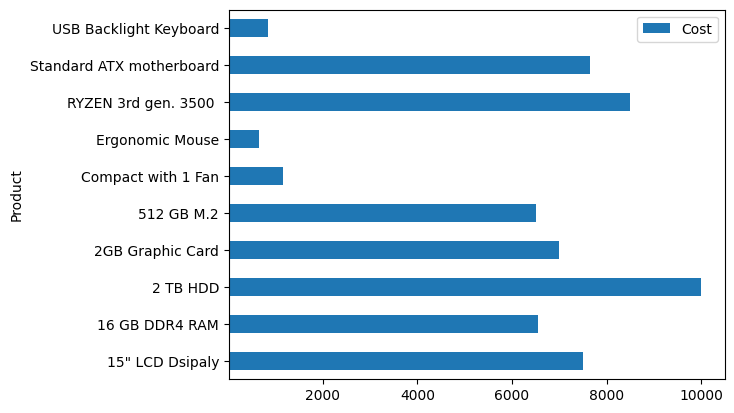

In [234]:
#media de preço de custo dos 10 primeiros produto
media_por_produto = produtos.head(10)[['Product', 'Cost']].groupby('Product').mean()
media_por_produto.plot.barh(xlim=10)

array([<Axes: ylabel='Quantity'>], dtype=object)

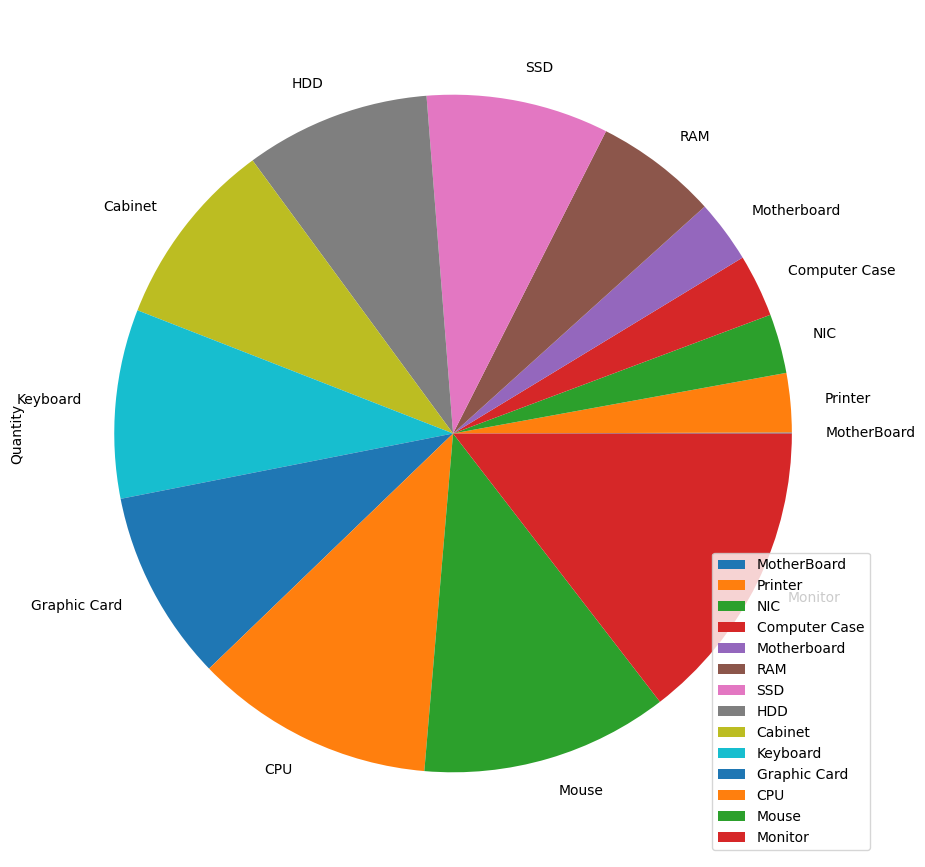

In [235]:
#frequencia de quantidade de vendas de produtos por categoria
qnt_produto = produtos[['Category', 'Quantity']].groupby('Category').sum()
qnt_produto.sort_values('Quantity', inplace=True)
qnt_produto.plot.pie(subplots=True, figsize=(16, 11))

<Axes: title={'center': 'Vendas por supervisor'}, xlabel='Assigned Supervisor'>

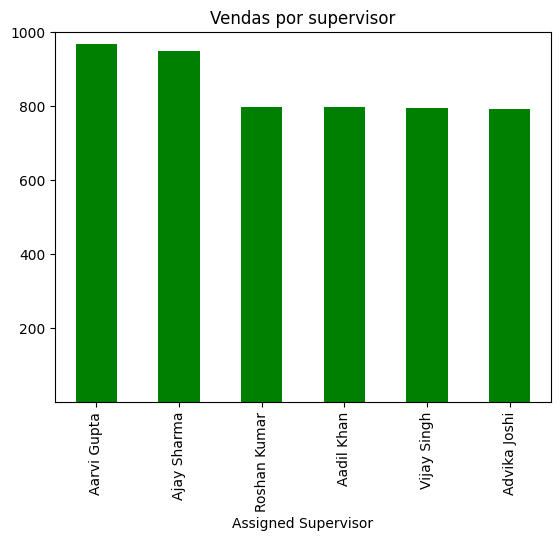

In [236]:
#Qual foi o supervisor que mais realizou vendas

total_vendas_supervisor = produtos['Assigned Supervisor'].value_counts()
total_vendas_supervisor.plot.bar(title = 'Vendas por supervisor', color='green', ylim = (1, 1000))

array([<Axes: ylabel='Quantity'>], dtype=object)

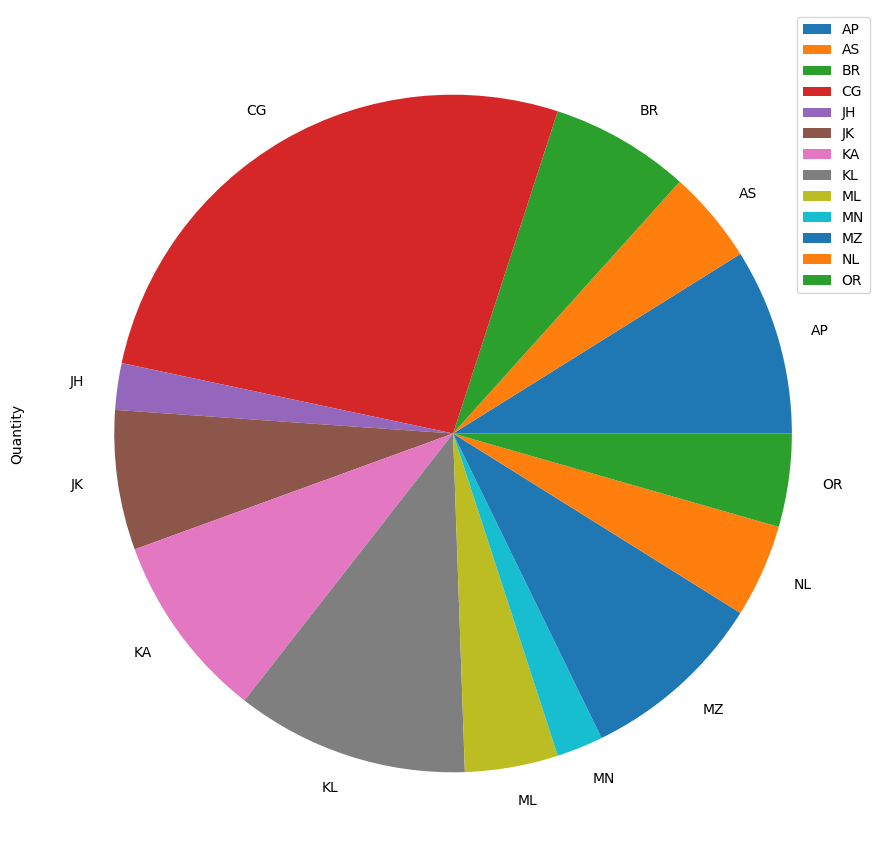

In [237]:
# Quais foram os 10 primeiros Estados que mais pessoas compraram produtos
qtd_vendas_estado = produtos.head(20)[['State_Code', 'Quantity']].groupby('State_Code').sum()
qtd_vendas_estado
qtd_vendas_estado.plot.pie(subplots=True, figsize=(16, 11))

In [238]:
produtos.head()

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan


# **Modelagem de Machine Learning**

In [239]:
#Qual produto obteve melhor lucro na quantidade de vendas
produtos[['Product', 'Total_Cost', 'Total_Sales']] [:5]

,Product,Total_Cost,Total_Sales
0,512 GB M.2,6500.0,8450.0
1,RYZEN 3rd gen. 3500,25500.0,33150.0
2,2GB Graphic Card,14000.0,18200.0
3,16 GB DDR4 RAM,19650.0,25545.0
4,Standard ATX motherboard,30600.0,39780.0


In [240]:
#Transformar o Product que é do tipo string para numerico para trabalhar no Machine Learning:
#Criar o encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

#Aplicando o encoder na variavel que está com string
produtos['Product'] = lb.fit_transform(produtos['Product'])

produtos[['Product', 'Total_Cost', 'Total_Sales']] [:5]

,Product,Total_Cost,Total_Sales
0,656,6500.0,8450.0
1,1072,25500.0,33150.0
2,427,14000.0,18200.0
3,303,19650.0,25545.0
4,1222,30600.0,39780.0


In [248]:
#Criar a váriavel de teste
X = produtos[['Product', 'Total_Cost']]

In [249]:
#Separando os conjuntos de teste e treino
x_treino, x_teste, y_treino, y_teste = train_test_split(X, produtos.Total_Sales, test_size=0.3)

In [250]:
#Verificar a forma dos dados
x_treino.shape, y_treino.shape

((3566, 2), (3566,))

In [251]:
x_teste.shape, y_teste.shape

((1529, 2), (1529,))

In [252]:
#treinando o modelo
lreng = LogisticRegression()
lreng.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [253]:
#Valores para o conjunto de teste
pred = lreng.predict(x_teste)

In [257]:
#Calculando a acurácia
precisao = accuracy_score(y_teste, pred)
print(f"A acurácia do regressor logístico foi de: {precisao * 100}%")

A acurácia do regressor logístico foi de: 12.884238064094177%


In [255]:
#Calculando o erro médio quadrático
mse = np.mean((pred - y_teste)**2)
print("O erro médio quadrático foi de:", mse)

O erro médio quadrático foi de: 221796137.39568347
